In [1]:
# import necessary libraries and set up the grid
import matplotlib.pyplot as plt
import numpy as np
import random as rd


# the number of cells in the x and y directions and the number of time steps
nx = 100
ny = 100
nt = 100#175

neighbour_range = 1  # the range of the neighbourhood
round_inf = (neighbour_range * 2 + 1) ** 2

# the initial state of the cells
male_init_number = 450
female_init_number = 450
prey_init_number = 2400 * 0.95
predator_init_number = 0

male_array = []
female_array = []
prey_array = []
predator_array = []
lamprey_array = []
sub_array = []

picture_style = "viridis"

In [2]:
# the SET of rules for the simulation
def inRange(l, r, key):
    if l <= key and key <= r:
        return True
    else:
        return False


# 存在概率修正
def nextCellLampary(countResult, state, flag):
    alive_lampary = countResult[0] + countResult[1]
    food_need_lampary = countResult[0] * 0.8 + countResult[1] * 1.2
    food_get_lampary = countResult[0] * 1.4 + countResult[1] * 0.6
    bitrh_ability_lampary = countResult[0] * 0.5 + countResult[1] * 1.5
    as_food_lampary = countResult[0] * 0.5 + countResult[1] * 1.5

    if flag == "lampary":
        if state == 0:
            if (
                inRange(-round_inf, 4, alive_lampary)
                and inRange(1.2, round_inf, bitrh_ability_lampary)
                and inRange(food_need_lampary, round_inf, countResult[2])
                and inRange(-round_inf, 6, countResult[3])
            ):
                female_probability = 0.38 + 0.11 * (countResult[2] - food_need_lampary)
                if rd.random() > female_probability:
                    return 1
                else:
                    return 2
            else:
                return 0

        elif state == 1:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(food_need_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                female_probability = 0.05 * (countResult[2] - food_need_lampary)
                if rd.random() > female_probability:
                    return 1
                else:
                    return 2
            else:
                return 0

        elif state == 2:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(food_need_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                female_probability = 0.69 + 0.1 * (countResult[2] - food_need_lampary)
                if rd.random() > female_probability:
                    return 1
                else:
                    return 2
            else:
                return 0

        else:
            print("state is wrong")
            exit(1)

    elif flag == "lampary_half_birth":
        if state == 0:
            if (
                inRange(-round_inf, 4, alive_lampary)
                and inRange(1.2, round_inf, bitrh_ability_lampary)
                and inRange(food_need_lampary, round_inf, countResult[2])
                and inRange(-round_inf, 6, countResult[3])
            ):
                return 3 - rd.choice([1, 2])
            else:
                return 0
        elif state != 0:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(food_need_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                return state
            else:
                return 0
        else:
            print("state is wrong")
            exit(1)

    elif flag == "lampary_half_alive":
        if state == 0:
            if (
                inRange(-round_inf, 4, alive_lampary)
                and inRange(1.2, round_inf, alive_lampary)
                and inRange(alive_lampary, round_inf, countResult[2])
                and inRange(-round_inf, 6, countResult[3])
            ):
                return 3 - rd.choice([1, 2])
            else:
                return 0
        elif state != 0:
            if (
                inRange(1, 5, alive_lampary)
                and inRange(alive_lampary - 1, round_inf, countResult[2])
                and inRange(-round_inf, 5, countResult[3])
            ):
                return state
            else:
                return 0
        else:
            print("state is wrong")
            exit(1)

    elif flag == "prey":
        if state == 0:
            if inRange(-round_inf, 1.5, food_get_lampary) and inRange(
                2, 4, countResult[2]
            ):
                return 1
            else:
                return 0
        elif state == 1:
            if inRange(-round_inf, 2.5, food_get_lampary) and inRange(
                3, 5, countResult[2]
            ):
                return 1
            else:
                return 0
        else:
            print("state is wrong")
            exit(1)

    elif flag == "predator":
        if state == 0:
            if countResult[3] == 0:
                return 0
            if (as_food_lampary / countResult[3] > 1.6 + 0.4 * rd.random()) and inRange(
                1, 9, countResult[3]
            ):
                return 1
            else:
                return 0
        elif state == 1:
            if (as_food_lampary / countResult[3] > 2 + 0.4 * rd.random()) and inRange(
                1, 9, countResult[3]
            ):
                return 1
            else:
                return 0
        else:
            print("state is wrong")
            exit(1)

    else:
        print("flag is wrong")
        exit(1)

In [3]:
class cellState:
    # initialize the state of the cells
    def __init__(self, nx, ny):
        self.nx = nx
        self.ny = ny

        self.lampreys = np.zeros(
            (nx, ny)
        )  # 0 = dead, 1 = alive male, 2 = alive female,
        self.prey = np.zeros((nx, ny))  # 0 = dead, 1 = alive
        self.predator = np.zeros((nx, ny))  # 0 = dead, 1 = alive

        self.lampreys_male_alive = 0
        self.lampreys_female_alive = 0
        self.prey_alive = 0
        self.predator_alive = 0

    # set the initial state of the cells
    def random_lampreys(self, total_number_1, total_number_2):
        # 随机生成 total_number_1 个 1
        for _ in range(total_number_1):
            while True:
                i, j = rd.randint(0, self.nx - 1), rd.randint(0, self.ny - 1)
                if self.lampreys[i][j] == 0:
                    self.lampreys[i][j] = 1
                    self.lampreys_male_alive += 1
                    break
        # 随机生成 total_number_2 个 2
        for _ in range(total_number_2):
            while True:
                i, j = rd.randint(0, self.nx - 1), rd.randint(0, self.ny - 1)
                if self.lampreys[i][j] == 0:
                    self.lampreys[i][j] = 2
                    self.lampreys_female_alive += 1
                    break

    # set the initial state of the cells
    def random_prey(self, total_number):
        # 随机生成 total_number 个 1
        count = 0
        while count < total_number:
            i, j = rd.randint(0, self.nx - 1), rd.randint(0, self.ny - 1)
            if self.prey[i][j] == 0:
                self.prey[i][j] = 1
                self.prey_alive += 1
                count += 1

    # set the initial state of the cells
    def random_predator(self, total_number):
        # 随机生成 total_number 个 1
        count = 0
        while count < total_number:
            i, j = rd.randint(0, self.nx - 1), rd.randint(0, self.ny - 1)
            if self.predator[i][j] == 0:
                self.predator[i][j] = 1
                self.predator_alive += 1
                count += 1

    # plot the state of the cells
    def plot_state(self, style, step):
        # plt.subplot(1, 3, 1, title="Lampreys")
        # plt.imshow(self.lampreys, cmap=style, vmin=0, vmax=2)
        # plt.subplot(1, 3, 2, title="Prey")
        # plt.imshow(self.prey, cmap=style, vmin=0, vmax=1)
        # plt.subplot(1, 3, 3, title="Predator")
        # plt.imshow(self.predator, cmap=style, vmin=0, vmax=1)
        plt.subplot(1, 2, 1, title="Lampreys")
        plt.imshow(self.lampreys, cmap="gray", vmin=0, vmax=2,interpolation='nearest')
        plt.axis('off')
        plt.subplot(1, 2, 2, title="Prey")
        plt.imshow(self.prey, cmap="gray", vmin=0, vmax=1,interpolation='nearest')
        plt.axis('off')

        plt.show()

        print("step: ", step)
        print("Lampreys  male  alive: ", self.lampreys_male_alive)
        print("Lampreys female alive: ", self.lampreys_female_alive)
        print("Prey            alive: ", self.prey_alive)
        print("Predator        alive: ", self.predator_alive)
        print("-----------------------------------")
        print("\n")

    # judge the state of the cells
    def countCellState(self, i, j):
        alive_male_neighbors = 0
        alive_female_neighbors = 0
        prey_neighbors = 0
        predator_neighbors = 0

        # for the edge, we assume that the top is connected to the bottom, and the left is connected to the right
        for x in range(-neighbour_range, neighbour_range + 1):
            for y in range(-neighbour_range, neighbour_range + 1):
                if self.lampreys[(i + x) % nx, (j + y) % ny] == 1:
                    alive_male_neighbors += 1
                elif self.lampreys[(i + x) % nx, (j + y) % ny] == 2:
                    alive_female_neighbors += 1
                elif self.prey[(i + x) % nx, (j + y) % ny] == 1:
                    prey_neighbors += 1
                elif self.predator[(i + x) % nx, (j + y) % ny] == 1:
                    predator_neighbors += 1

        result = (
            alive_male_neighbors,
            alive_female_neighbors,
            prey_neighbors,
            predator_neighbors,
        )
        return result

    # update the state of the cells
    def updateState(self):
        new_lampreys = np.zeros((self.nx, self.ny))
        new_prey = np.zeros((self.nx, self.ny))
        new_predator = np.zeros((self.nx, self.ny))
        new_male_alive = 0
        new_female_alive = 0
        new_prey_alive = 0
        new_predator_alive = 0

        # for the lampreys
        for i in range(self.nx):
            for j in range(self.ny):
                new_lampreys[i][j] = nextCellLampary(
                    self.countCellState(i, j), self.lampreys[i][j], "lampary"
                )
                if new_lampreys[i][j] == 1:
                    new_male_alive += 1
                elif new_lampreys[i][j] == 2:
                    new_female_alive += 1

        self.lampreys = new_lampreys.copy()
        self.lampreys_male_alive = new_male_alive
        self.lampreys_female_alive = new_female_alive

        # for the prey and the predator
        for i in range(self.nx):
            for j in range(self.ny):
                # for the prey
                new_prey[i][j] = nextCellLampary(
                    self.countCellState(i, j), self.prey[i][j], "prey"
                )
                if new_prey[i][j] == 1:
                    new_prey_alive += 1
                new_predator[i][j] = nextCellLampary(
                    self.countCellState(i, j), self.predator[i][j], "predator"
                )
                if new_predator[i][j] == 1:
                    new_predator_alive += 1

        self.prey = new_prey.copy()
        self.prey_alive = new_prey_alive
        self.predator = new_predator.copy()
        self.predator_alive = new_predator_alive

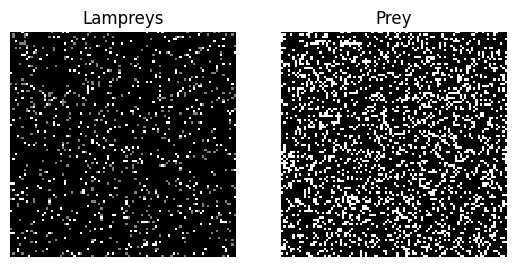

step:  -1
Lampreys  male  alive:  450
Lampreys female alive:  450
Prey            alive:  2280
Predator        alive:  0
-----------------------------------




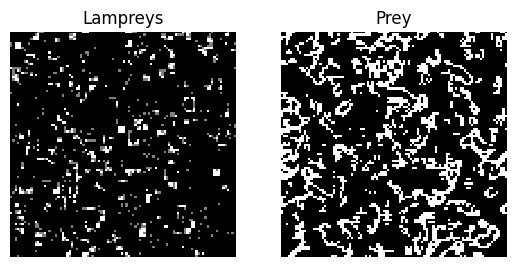

step:  19
Lampreys  male  alive:  525
Lampreys female alive:  535
Prey            alive:  2480
Predator        alive:  0
-----------------------------------




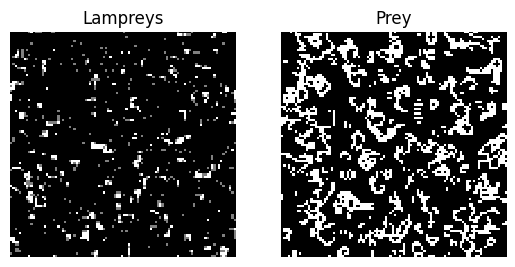

step:  39
Lampreys  male  alive:  472
Lampreys female alive:  444
Prey            alive:  2478
Predator        alive:  0
-----------------------------------




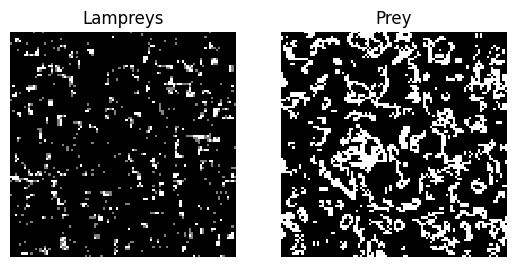

step:  59
Lampreys  male  alive:  495
Lampreys female alive:  450
Prey            alive:  2541
Predator        alive:  0
-----------------------------------




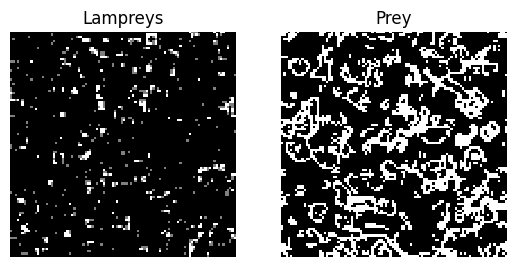

step:  79
Lampreys  male  alive:  417
Lampreys female alive:  393
Prey            alive:  2839
Predator        alive:  0
-----------------------------------




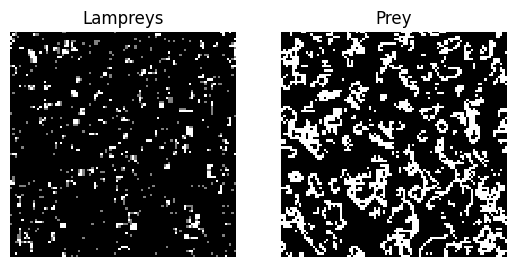

step:  99
Lampreys  male  alive:  445
Lampreys female alive:  444
Prey            alive:  2555
Predator        alive:  0
-----------------------------------


The end of the simulation
[2280, 2673, 2315, 2300, 2205, 2351, 2284, 2419, 2479, 2610, 2579, 2547, 2690, 2802, 2990, 2784, 2770, 2719, 2724, 2633, 2480, 2555, 2475, 2361, 2358, 2223, 2233, 2282, 2384, 2520, 2692, 3016, 2741, 2944, 2720, 2767, 2664, 2477, 2475, 2469, 2478, 2563, 2643, 2588, 2467, 2444, 2393, 2270, 2237, 2156, 2246, 2124, 2276, 2436, 2597, 2683, 2670, 2595, 2615, 2487, 2541, 2631, 2590, 2605, 2577, 2738, 2525, 2534, 2643, 2463, 2477, 2471, 2482, 2387, 2210, 2293, 2392, 2487, 2599, 2660, 2839, 2863, 2848, 2884, 2821, 2800, 2744, 2759, 2640, 2515, 2438, 2382, 2393, 2425, 2433, 2567, 2454, 2530, 2522, 2511, 2555]
[450, 1054, 649, 734, 585, 542, 541, 504, 459, 513, 531, 523, 453, 456, 436, 496, 523, 501, 562, 505, 525, 484, 496, 467, 540, 473, 429, 433, 400, 455, 399, 436, 465, 420, 426, 476, 491, 506, 463, 485, 472, 4

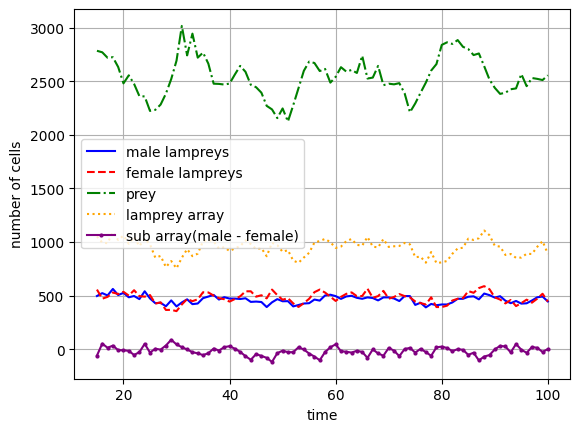

In [4]:
# main function
if __name__ == "__main__":
    state = cellState(nx, ny)
    state.random_lampreys(male_init_number, female_init_number)
    state.random_prey(prey_init_number)
    state.random_predator(predator_init_number)
    state.plot_state(picture_style, -1)

    male_array.append(state.lampreys_male_alive)
    female_array.append(state.lampreys_female_alive)
    prey_array.append(state.prey_alive)
    predator_array.append(state.predator_alive)


    for i in range(0, nt):
        state.updateState()

        # 此刻发生一场灾难，lamprey数量减少一半
        if i % 65 == 120:
            disaster_male = state.lampreys_male_alive // 3 * 2
            disaster_female = state.lampreys_female_alive // 3 * 2
            exsit_set_male = []
            exsit_set_female = []
            for x in range(0, nx):
                for y in range(0, ny):
                    if state.lampreys[x][y] == 1:
                        exsit_set_male.append((x, y))
                    elif state.lampreys[x][y] == 2:
                        exsit_set_female.append((x, y))
            while disaster_male > 0:
                (x,y) = rd.choice(exsit_set_male)
                exsit_set_male.remove((x,y))
                state.lampreys[x][y] = 0
                disaster_male -= 1
                state.lampreys_male_alive -= 1
            while disaster_female > 0:
                (x,y) = rd.choice(exsit_set_female)
                exsit_set_female.remove((x,y))
                state.lampreys[x][y] = 0
                disaster_female -= 1
                state.lampreys_female_alive -= 1
            print("A disaster happened ! ! !")





        # 此刻发生一场灾难，prey数量减少一半
        if i %1 != 0 and i > 60: 
            disaster = state.prey_alive - 400
            exsit_set = []
            for x in range(0, nx):
                for y in range(0, ny):
                    if state.prey[x][y] == 1:
                        exsit_set.append((x, y))
            while disaster > 0:
                (x,y) = rd.choice(exsit_set)
                exsit_set.remove((x,y))
                state.prey[x][y] = 0
                disaster -= 1
                state.prey_alive -= 1
            print("A disaster happened ! ! !")

        # 此刻发生一场灾难，prey数量增多一半
        if i == 1010:
            disaster = state.prey_alive //  3 * 2
            exsit_set = []
            for x in range(0, nx):
                for y in range(0, ny):
                    if state.prey[x][y] == 0:
                        exsit_set.append((x, y))
            while disaster > 0:
                (x,y) = rd.choice(exsit_set)
                exsit_set.remove((x,y))
                state.prey[x][y] = 1
                disaster -= 1
                state.prey_alive += 1
            print("A disaster happened ! ! !")

        # append the number of cells to the array
        male_array.append(state.lampreys_male_alive)
        female_array.append(state.lampreys_female_alive)
        prey_array.append(state.prey_alive)
        predator_array.append(state.predator_alive)

        # plot the state of the cells
        if i % 20 == 19:
            state.plot_state(picture_style, i)

        # check if the number of cells is conserved
        if (
            state.lampreys_female_alive
            + state.lampreys_male_alive
            + state.prey_alive
            + state.predator_alive
            > 3 * nx * ny
        ):
            print("Error: the number of cells is not conserved")
            break


    print("The end of the simulation")
    for i in range(0, nt + 1):
        lamprey_array.append(male_array[i] + female_array[i]) 
        sub_array.append(male_array[i] - female_array[i])
    print(prey_array)
    print(male_array)
    print(female_array)
    print(lamprey_array)
    print(sub_array)
    #print(predator_array)   

    # plot the trend of the number of cells
    plt.plot(range(15, nt + 1), male_array[15:], label="male lampreys", linestyle='-', color='blue')
    plt.plot(range(15, nt + 1), female_array[15:], label="female lampreys", linestyle='--', color='red')
    plt.plot(range(15, nt + 1), prey_array[15:], label="prey", linestyle='-.', color='green')
    plt.plot(range(15, nt + 1), lamprey_array[15:], label="lamprey array", linestyle=':', color='orange')
    plt.plot(range(15, nt + 1), sub_array[15:], label="sub array(male - female)", linestyle='-', color='purple', marker='o', markersize=2)
    #plt.plot(range(15, nt + 1), predator_array[15:], label="predator")
    plt.xlabel("time")
    plt.ylabel("number of cells")
    plt.legend()
    plt.grid(True)
    plt.show()

#    # plot the trend of the number of cells
#     plt.plot(range(50, 80), male_array[50:80], label="male lampreys")
#     plt.plot(range(50, 80), female_array[50:80], label="female lampreys")
#     plt.plot(range(50, 80), prey_array[50:80], label="prey")
#     plt.plot(range(50, 80), lamprey_array[50:80], label="lamprey array")
#     plt.plot(range(50, 80), sub_array[50:80], label="sub array(male - female)")
#     #plt.plot(range(50, 81), predator_array[15:], label="predator")
#     plt.xlabel("time")
#     plt.ylabel("number of cells")
#     plt.legend()
#     plt.show()



    

(-0.5, 1.5, 1.5, -0.5)

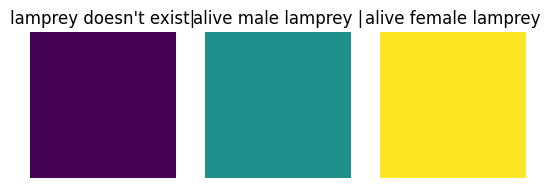

In [5]:
# color bar
_0_ = np.array([[0, 0], [0, 0]])
_1_ = np.array([[1, 1], [1, 1]])
_2_ = np.array([[2, 2], [2, 2]])

plt.subplot(1, 3, 1, title="lamprey doesn't exist|")
plt.imshow(_0_, cmap=picture_style, interpolation='nearest', vmin=0, vmax=2)
plt.axis('off')
plt.subplot(1, 3, 2, title="alive male lamprey |")
plt.imshow(_1_, cmap=picture_style, interpolation='nearest', vmin=0, vmax=2)
plt.axis('off')
plt.subplot(1, 3, 3, title="alive female lamprey")
plt.imshow(_2_, cmap=picture_style, interpolation='nearest', vmin=0, vmax=2)
plt.axis('off')
